In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df =pd.read_csv('beacons.csv')
df.shape

(1916, 10)

In [3]:
X =  df.iloc[:1700,3:]
y =   df.iloc[:1700,1:3]
X1 =  df.iloc[1700:,3:]
y1 =   df.iloc[1700:,1:3]

In [4]:
y['x']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
1695    5.4
1696    5.4
1697    5.4
1698    5.4
1699    5.4
Name: x, Length: 1700, dtype: float64

In [5]:
xg_reg = xgb.XGBRegressor( 
    objective ='reg:linear',
    colsample_bytree = 0.3, 
    alpha = 10, 
    max_depth=10,
    n_estimators=1000,
    learning_rate=1.0
)
xg_reg.fit(X, y['x'])

C:\Users\poulr\Anaconda32\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\poulr\Anaconda32\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:52:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=1.0, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [6]:
xg_reg1 = xgb.XGBRegressor( 
    objective ='reg:linear',
    colsample_bytree = 0.3, 
    alpha = 10, 
    max_depth=10,
    n_estimators=1000,
    learning_rate=1.0
)
xg_reg1.fit(X, y['y'])

C:\Users\poulr\Anaconda32\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\poulr\Anaconda32\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:52:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=1.0, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [7]:
predictions = xg_reg.predict(X1)
prediction= xg_reg1.predict(X1)

predictions = pd.DataFrame(predictions)
predictions = predictions.rename(columns={0:'a'})
prediction = pd.DataFrame(prediction)
prediction = prediction.rename(columns={0:'b'})

y1 =y1.reset_index()
y1['a'] = predictions['a']
y1['b'] = prediction['b']

y1['distance']=np.sqrt((y1['x']-y1['a'])**2+(y1['y']-y1['b'])**2)
y1['distance'].mean()

4.359236830342893

In [8]:
from sklearn import metrics

maex = metrics.mean_absolute_error(y1['x'],y1['a'])
maey= metrics.mean_absolute_error(y1['y'],y1['b'])
maeauto = (maex + maey)/2

In [9]:
msex = metrics.mean_squared_error(y1['x'],y1['a'])
msey= metrics.mean_squared_error(y1['y'],y1['b'])
msemain = (msex + msey)/2

In [10]:
rmsex = np.sqrt(metrics.mean_squared_error(y1['x'],y1['a']))
rmsey= np.sqrt(metrics.mean_squared_error(y1['y'],y1['b']))
rmsemain = (rmsex + rmsey)/2

In [11]:
print("Mean absolute error : ", maeauto.mean())
print("Mean squared error : ", msemain.mean())
print("Root Mean squared error : ", rmsemain.mean())

Mean absolute error :  2.8111100593788754
Mean squared error :  13.634827270690904
Root Mean squared error :  3.6802861963029736


In [12]:
a = pd.DataFrame(xg_reg1.predict(X1))
b = pd.DataFrame(xg_reg.predict(X1))
b = b.rename(columns={0:'bc1'})
c = pd.concat([a,b],axis=1)
c = c.rename(columns={0:'bc2'})
preds = c.values


Y_test = y1[['a','b']]
Y_test = Y_test.values

In [13]:
def l2_dist(p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    x1, y1 = np.array(x1), np.array(y1)
    x2, y2 = np.array(x2), np.array(y2)
    dx = x1 - x2
    dy = y1 - y2
    dx = dx ** 2
    dy = dy ** 2
    dists = dx + dy
    dists = np.sqrt(dists)
    return np.mean(dists), dists

#preds = ada_reg1.predict(X1)
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (Y_test[:, 0] , Y_test[:, 0]))
print(l2dists_mean)

4.491798


In [14]:
Y_test

array([[-7.83222556e-01,  1.13359079e+01],
       [ 5.40000582e+00,  1.01997299e+01],
       [ 1.32793868e+00,  1.17377510e+01],
       [ 6.41100526e-01,  7.30274963e+00],
       [ 1.35990882e+00,  4.80341053e+00],
       [ 1.84539640e+00,  4.98048592e+00],
       [ 2.20190001e+00,  1.00503569e+01],
       [ 2.49712706e+00,  8.50547314e+00],
       [ 2.66527486e+00,  1.15443726e+01],
       [ 2.67659330e+00,  9.42125320e+00],
       [ 5.47344112e+00,  1.26112738e+01],
       [ 1.86000395e+00,  9.84947109e+00],
       [ 2.94022107e+00,  1.49030838e+01],
       [ 2.35960770e+00,  1.69584999e+01],
       [ 2.29151440e+00,  1.69041824e+01],
       [ 3.01894784e+00,  1.19564247e+01],
       [ 7.38620043e-01,  1.30669632e+01],
       [ 5.99137545e+00,  9.77534866e+00],
       [ 2.56495452e+00,  5.87239790e+00],
       [ 5.62682962e+00,  7.06545925e+00],
       [ 2.38290930e+00,  7.56156492e+00],
       [ 2.98863125e+00,  1.25638657e+01],
       [ 2.91916871e+00,  8.16599274e+00],
       [ 2.

In [15]:
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (Y_test[:, 0] , Y_test[:, 0]))
print(l2dists_mean)

4.491798


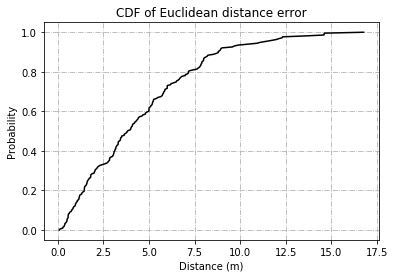

In [21]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
sortedl2_deep = np.sort(l2dists)
prob_deep = 1. * np.arange(len(sortedl2_deep))/(len(sortedl2_deep) - 1)
fig, ax = plt.subplots()
lg1, = ax.plot(sortedl2_deep, prob_deep, color='black')
plt.title('CDF of Euclidean distance error')
plt.xlabel('Distance (m)')
plt.ylabel('Probability')
plt.grid(True)
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')

plt.savefig('Figure_CDF_error.png', dpi=300)
plt.show()
plt.close()